In [2]:
import mne 
import os.path as op
import numpy as np
from mne.datasets import eegbci, fetch_fsaverage

In [3]:
# Download fsaverage files
fs_dir = fetch_fsaverage(verbose=True)
subjects_dir = op.dirname(fs_dir)

# The files live in:
subject = "fsaverage"
trans = "fsaverage"  # MNE has a built-in fsaverage transformation
src = op.join(fs_dir, "bem", "fsaverage-ico-5-src.fif")
bem = op.join(fs_dir, "bem", "fsaverage-5120-5120-5120-bem-sol.fif")

(raw_fname,) = eegbci.load_data(subject=1, runs=[6])
raw = mne.io.read_raw_edf(raw_fname, preload=True)

# Clean channel names to be able to use a standard 1005 montage
new_names = dict(
    (ch_name, ch_name.rstrip(".").upper().replace("Z", "z").replace("FP", "Fp"))
    for ch_name in raw.ch_names
)
raw.rename_channels(new_names)

# Read and set the EEG electrode locations, which are already in fsaverage's
# space (MNI space) for standard_1020:
montage = mne.channels.make_standard_montage("standard_1005")
raw.set_montage(montage)
raw.set_eeg_reference(projection=True)  # needed for inverse modeling

# Check that the locations of EEG electrodes is correct with respect to MRI
mne.viz.plot_alignment(
    raw.info,
    src=src,
    eeg=["original", "projected"],
    trans=trans,
    show_axes=True,
    mri_fiducials=True,
    dig="fiducials",
)

0 files missing from root.txt in C:\Users\stapl\mne_data\MNE-fsaverage-data
0 files missing from bem.txt in C:\Users\stapl\mne_data\MNE-fsaverage-data\fsaverage
Extracting EDF parameters from C:\Users\stapl\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Reading C:\Users\stapl\mne_data\MNE-fsaverage-data\fsaverage\bem\fsaverage-ico-5-src.fif...
Using pyvistaqt 3d backend.

Using outer_skin.surf for head surface.
Channel types::	eeg: 64
Projecting sensors to the head surface


In [5]:
fwd = mne.make_forward_solution(
    raw.info, trans=trans, src=src, bem=bem, eeg=True, mindist=5.0, n_jobs=None
)
print(fwd)

Source space          : C:\Users\stapl\mne_data\MNE-fsaverage-data\fsaverage\bem\fsaverage-ico-5-src.fif
MRI -> head transform : c:\Users\stapl\anaconda3\envs\nilearnenv\lib\site-packages\mne\data\fsaverage\fsaverage-trans.fif
Measurement data      : instance of Info
Conductor model   : C:\Users\stapl\mne_data\MNE-fsaverage-data\fsaverage\bem\fsaverage-5120-5120-5120-bem-sol.fif
Accurate field computations
Do computations in head coordinates
Free source orientations

Reading C:\Users\stapl\mne_data\MNE-fsaverage-data\fsaverage\bem\fsaverage-ico-5-src.fif...
Read 2 source spaces a total of 20484 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999994  0.003552  0.000202      -1.76 mm
    -0.003558  0.998389  0.056626      31.09 mm
    -0.000001 -0.056626  0.998395      39.60 mm
     0.000000  0.000000  0.000000       1.00

Read  64 EEG channels from info
Head coordinate coil definitions created.
Source spaces are now in head coordinates.

Setting up t

I've just pasted all other attempts at a leadfield here. Doesn't work as parameters need to be imported to notebook


In [ ]:
import numpy as np
import pandas as pd
from mne.datasets import fetch_fsaverage
from scipy.interpolate import NearestNDInterpolator as Interpolator
from mne.datasets import fetch_fsaverage

src = mne.read_source_spaces('C:/Users/stapl/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-ico-5-src.fif')
# Get positions and orientations
fsaverage_pos = np.array(src[1]['rr'])  # Vertex positions (3, 163842). 3D, sources (ignoring left/right hemisphere)
fsaverage_ori = np.array(src[1]['nn'])  # Vertex orientations (3, 163842)

#rr coordinates, nn vector normals 

df = pd.read_csv('Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.Centroid_RAS.csv')

schaefer_pos = df[['R', 'A', 'S']].values # produces (100, 3) where index is the ROI label
# schaefer_pos = df[['R', 'A', 'S']].values.astype(float) / 1000.0 # Converting to metres to be the same as fsaverage

schaefer_ori = np.zeros(schaefer_pos.shape)

for i in range(3):
    interp = Interpolator(fsaverage_pos, fsaverage_ori[:, i])
    schaefer_ori[:, i] = interp(schaefer_pos[:, 0], schaefer_pos[:, 1], schaefer_pos[:, 2])

old_info = raw_eeg_file.info 

new_info = mne.create_info(ch_names=old_info['ch_names'], sfreq=old_info['sfreq'], ch_types='eeg')
new_info.set_montage('standard_1020')  # Set the montage to standard 10-20 system

trans = 'C:/Users/stapl/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-trans.fif'

schaefer_positions_dict = {
    'rr': schaefer_pos,
    'nn': schaefer_ori
}

source_space = mne.setup_volume_source_space(pos=schaefer_positions_dict)

print(fsaverage_pos[0])
print(schaefer_pos[0])

mne.viz.plot_alignment(
    new_info,
    trans,
    src=src,
    dig=True,
    eeg=dict(original=1),
    surfaces="brain", 
)

# mne.viz.plot_sensors(
#     new_info,
#     kind='3d'
# )


In [ ]:
# Make BEM model #######################
fs_dir = "C:/Users/stapl/mne_data/MNE-fsaverage-data/"

model = mne.make_bem_model(
    subject='fsaverage',
    ico=4,
    conductivity=(0.3, 0.006, 0.3),
    subjects_dir=fs_dir,
)

bem = mne.make_bem_sol_eegution(model)


Creating the BEM geometry...
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
outer skin  CM is  -0.21 -19.38  -0.23 mm
outer skull CM is  -0.19 -19.34  -0.49 mm
inner skull CM is  -0.53 -21.10   6.21 mm
Checking that surface outer skull is inside surface outer skin  ...
Checking that surface inner skull is inside surface outer skull ...
Checking distance between outer skin  and outer skull surfaces...
Minimum distance between the outer skin  and outer skull surfaces is approximately    1.6 mm
Checking distance between outer skull and inner skull surfaces...
Minimum distance between the outer skull and inner skull surfaces is approximately    5.4 mm
Surfaces passed the basic topology checks.
Complete.

Three-layer model surfaces loaded.
Computing the linear collocation solution...
    Matrix coefficients...
     

In [ ]:
fsaverage = fetch_fsaverage(verbose=True)
subject_dir="C:/Users/stapl/mne_data/MNE-fsaverage-data"

# Scatter plot with eeg points, schaefer pos and fsaverage source positions 

# fig = mne.viz.plot_alignment(
#     #src=source_space,
#     trans='fsaverage',
#     bem=bem,
#     surfaces='brain',
# )

mne.viz.plot_alignment(
    info=new_info,
    trans=trans,
    subject='fsaverage',
    surfaces=dict(head=0.5, brain=0.5),
    eeg=True,
    dig=True,
)

#Getting an empty plot

0 files missing from root.txt in C:\Users\stapl\mne_data\MNE-fsaverage-data
0 files missing from bem.txt in C:\Users\stapl\mne_data\MNE-fsaverage-data\fsaverage


Using outer_skin.surf for head surface.
Channel types::	eeg: 19


In [ ]:
# Create the forward sol_eegution ##################
fwd = mne.make_forward_sol_eegution(
    info=new_info,
    trans=trans,
    src=source_space,
    bem=bem,
    eeg=True,
    n_jobs=None,
    verbose=True,
)



Source space          : <SourceSpaces: [<discrete, n_used=100>] MRI (surface RAS) coords, ~8 kB>
MRI -> head transform : C:\Users\stapl\mne_data\MNE-fsaverage-data\fsaverage\bem\fsaverage-trans.fif
Measurement data      : instance of Info
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 1 source spaces a total of 100 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999994  0.003552  0.000202      -1.76 mm
    -0.003558  0.998389  0.056626      31.09 mm
    -0.000001 -0.056626  0.998395      39.60 mm
     0.000000  0.000000  0.000000       1.00

Read  19 EEG channels from info
Head coordinate coil definitions created.
Source spaces are now in head coordinates.

Employing the head->MRI coordinate transform with the BEM model.
BEM model instance of ConductorModel is now set up

Source spaces are in head coordinates.
Checking that the sources are inside the surfa

RuntimeError: No points left in source space after excluding points close to inner skull.

    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Changing to fixed-orientation forward solution with surface-based source orientations...
    [done]
(600, 100)
(19, 100)


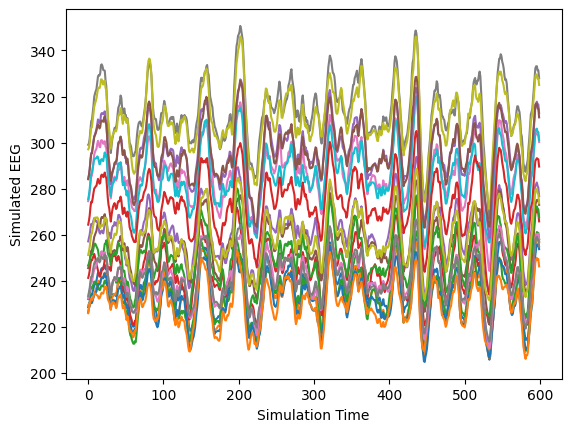

In [ ]:
fwd_fixed = mne.convert_forward_sol_eegution(fwd, force_fixed=True)

# data contains The forward sol_eegution data. 
# The shape will be (n_channels, nsource) for a fixed-orientation forward and (n_channels, nsource * 3) for a free-orientation forward.
# SO must first convert to fixed orientation 

leadfield_fixed = fwd_fixed["sol_eeg"]["data"]

leadfield_normalised = (leadfield_fixed - np.min(leadfield_fixed)) / (np.max(leadfield_fixed) - np.min(leadfield_fixed))

print(V_T_sim.shape) # (150015, 100)
print(leadfield_normalised.shape) # (19, 100)

# print(fwd['sol_eeg']['row_names']) 
# ['Fp2', 'F8', 'T4', 'T6', 'O2', 'Fp1', 'F7', 'T3', 'T5', 'O1', 'F4', 'C4', 'P4', 'F3', 'C3', 'P3', 'Fz', 'Cz', 'Pz']

# Pick 4 of the shaefer sources  - then look at where the 19 EEG channels
# Min x, max x, min y, max y 
# negative x means left, negative y means back

# 600x100 * 100x19 = 600x19
simulated_eeg = np.dot(V_T_sim, leadfield_normalised.T)

for node in range(19):
    plt.plot(simulated_eeg[:, node], label=f'Node {node+1}')

plt.xlabel('Simulation Time')
plt.ylabel('Simulated EEG')

# Add legend to the right of the plot
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# Z score on each channel

ValueError: Data and pos need to be of same length. Got data of length 100, pos of length 19

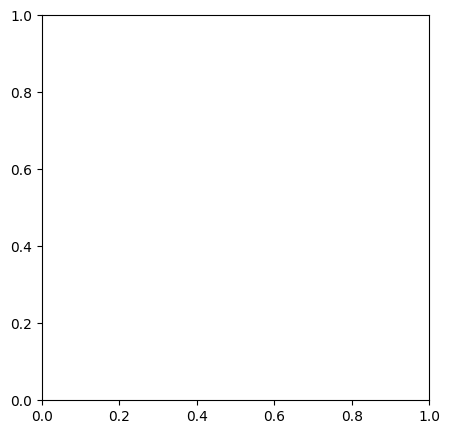

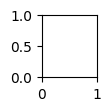

: 

In [ ]:
# n_sensors = len(fwd_fixed['info']['chs'])  # 19 EEG nodes
# n_sources = leadfield_normalised.shape[1]  # 100 parcels

# # Create layout from the montage
# layout = mne.channels.make_eeg_layout(info=new_info)

# # Create a figure with subplots for each EEG node
# fig, axes = plt.subplots(5, 4, figsize=(15, 12))
# axes = axes.flatten()

# # Plot the contribution of each source to each EEG node
# for sensor_idx in range(n_sensors):
#     # Get the contributions of all sources to the current EEG node
#     contributions = leadfield_normalissed[sensor_idx, :]  # Shape (100,)

#     # Plot topographic map
#     mne.viz.plot_topomap(contributions, layout.pos[:, :2], cmap="Spectral_r", axes=axes[sensor_idx],
#                           sensors=True, show=False)
    
#     axes[sensor_idx].set_title('EEG Node {}'.format(sensor_idx))

# plt.tight_layout()
# plt.show()



